# Sheet 5
## Author
Maximilian Stablum 

Note: I created the following Sheet together with Tamino Gaub (tamino.gaub@student.uibk.ac.at). The Sheet looks in the most parts identical to him.

## Excersise 2a

What is the curse of dimensionality? How can we mitigate it? Does Principle Component Analysis (PCA) help?

**Curse of Dimensionality:**
- **Definition:** The problem where data points become increasingly rare in high-dimensional spaces.
- **Consequences:** Makes pattern recognition and model training more difficult, increases computational and storage requirements.

**Mitigation Techniques:**
- **Feature Selection:** Choosing the most important features.
- **Dimensionality Reduction:** Reducing the number of features.
- **Regularization:** Adding penalties for complex models.

**Principal Component Analysis (PCA):**
- **Goal:** Reduces the dimensionality of data by extracting the most important components.
- **Advantages:** Decreases data complexity while retaining essential information.
- **Application:** Particularly useful for large, high-dimensional datasets.



## Excersise 2b

### How Principal Component Analysis (PCA) works:

**Standardization:** standardize the range of continuous output variables so that each contributes equally to the analysis. This involves adjusting the data to have a mean of zero and a standard deviation of one.

**Calculating the covariance matrix:** Calculate the covariance matrix to determine correlations between variables. This matrix shows how much the variables vary from the mean with respect to each other.

**Eigenvectors and Eigenvalues:** Calculate the eigenvectors and eigenvalues of the covariance matrix to identify the principal components. This involves selecting the top eigenvectors based on their eigenvalues. Eigenvector expresses the direction the data shows the highest variation.

**Create a feature vector:** Create a feature vector to decide which principal components to retain. This means that we select the most important directions (eigenvectors) based on how much the data varies in these directions (eigenvalues).

**Reshaping the data:** Reshape the data along the principal component axes. This means projecting the original data onto the new feature space defined by the principal components.

### Pre-processing steps before PCA:

**Standardization:** ensure that all variables are on the same scale by standardizing the data (subtract the mean and divide by the standard deviation for each variable).

**Dealing with missing values:** Imputing or removing missing values to avoid bias in the analysis.

**Normalization:** Normalize the data if the variables have different units or scales.

## Excersise 2c

In [1]:
#Import required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from sklearn.decomposition import PCA
import matplotlib as mpl



In [2]:
# read csv into dataframe
df = pd.read_csv('./data/primarySources_MLOps.csv', delimiter=';')

In [3]:
def remove_stopwords(text):
    return " ".join([word for word in text.lower().split() if word not in ENGLISH_STOP_WORDS])

# Stopwords removing from the Abstracts
df['Cleaned_Abstract'] = df['Abstract'].apply(remove_stopwords)

stemmer = PorterStemmer()

# Stem the text
def stem_text(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# Execute the function
df['Stemmed_Abstract'] = df['Cleaned_Abstract'].apply(stem_text)

# Preprocessing
vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(df['Stemmed_Abstract'])
feature_names = vectorizer.get_feature_names_out()
# Convert the output to a DataFrame
output_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Display the output DataFrame
print(output_df.sample(10))

      000  000x  005  01  023  07  09  10  100  1000  ...  zon  zone  \
506     0     0    0   0    0   0   0   0    0     0  ...    0     0   
792     0     0    0   0    0   0   0   0    0     0  ...    0     0   
45      0     0    0   0    0   0   0   0    0     0  ...    0     0   
190     0     0    0   0    0   0   0   0    0     0  ...    0     0   
494     0     0    0   0    0   0   0   0    0     0  ...    0     0   
1007    0     0    0   0    0   0   0   0    0     0  ...    0     0   
890     0     0    0   0    0   0   0   0    0     0  ...    0     0   
632     0     0    0   0    0   0   0   0    0     0  ...    0     0   
203     0     0    0   0    0   0   0   0    0     0  ...    0     0   
422     0     0    0   0    0   0   0   0    0     0  ...    0     0   

      zonotope  zonotopes  zoo  zoos  zqs1022  zurich  âˆ¼2  îµ  
506          0          0    0     0        0       0     0   0  
792          0          0    0     0        0       0     0   0  
45       

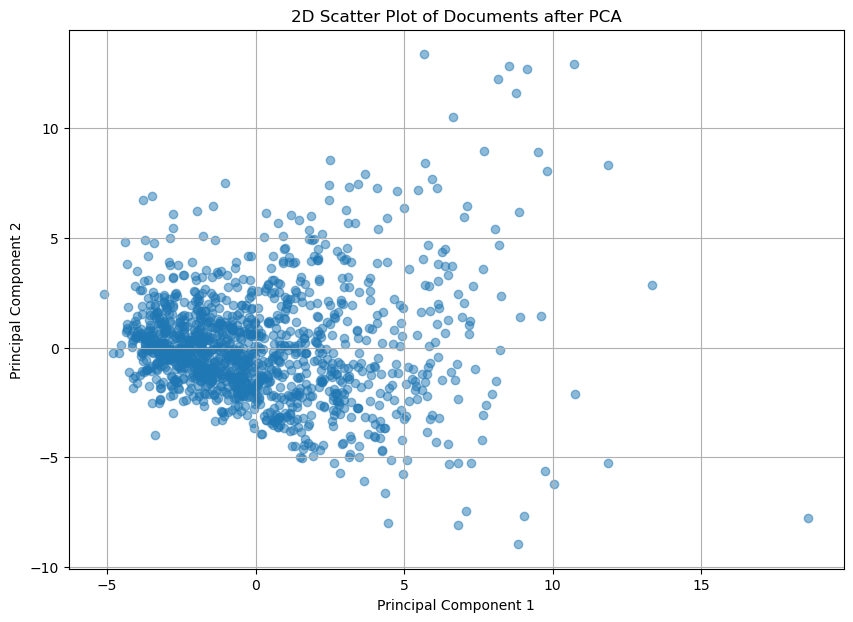

In [4]:
# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Plot the 2-dimensional scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('2D Scatter Plot of Documents after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Interpretation: 
 
The Abstracts dont form Clusters in this plot, as all Abstracts are out of literature studies focusing on the continuous development of AI their input of the abstracts might by very similiar

## Excersise 2d

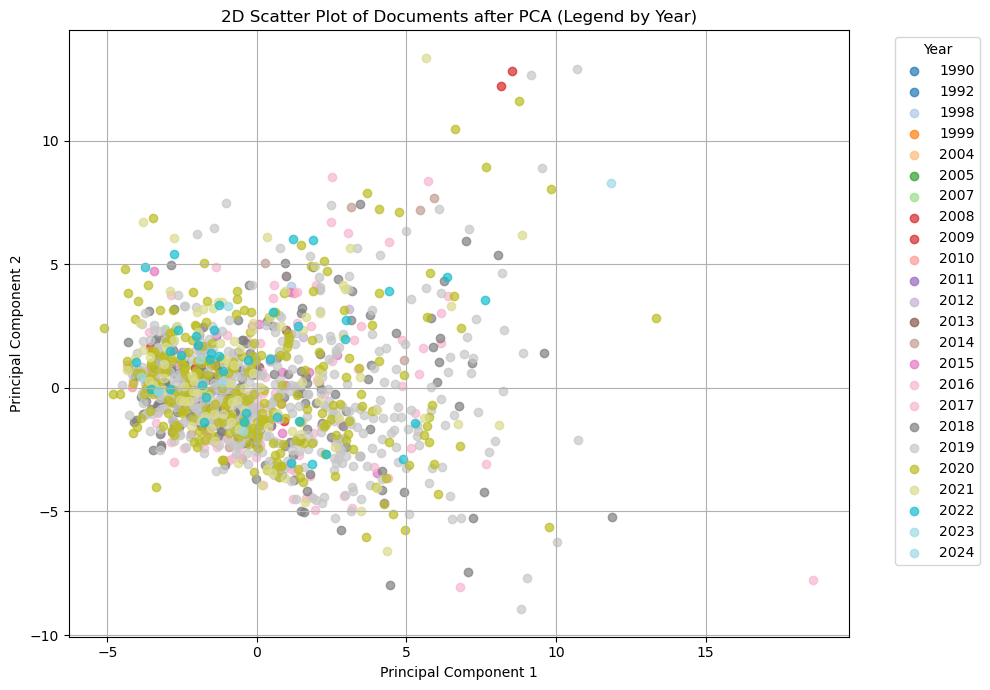

In [5]:
# Add the year column to the PCA DataFrame
pca_df['Year'] = df['Year']

# Generate a unique color for each year
unique_years = sorted(pca_df['Year'].unique())  # Sort years to ensure consistent coloring
colors = mpl.colormaps['tab20'].resampled(len(unique_years))
color_map = dict(zip(unique_years, [colors(i) for i in range(len(unique_years))]))

# Plot the 2-dimensional scatter plot with legend for years
plt.figure(figsize=(10, 7))
for year, color in color_map.items():
    subset = pca_df[pca_df['Year'] == year]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=str(year), alpha=0.7)

plt.title('2D Scatter Plot of Documents after PCA (Legend by Year)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend on the side
plt.grid(True)
plt.tight_layout()
plt.show()

It is visible that most datapoints are after the year 2018, which is clear to the increasing interest to the topic of AI